# DATA PREPARATION

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
s
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

## Loading data and checking first 10 entries

In [469]:
df_train = pd.read_csv("C:/Users/HP/OneDrive/Desktop/projectWorks/Credit_score/credit score classification/train.csv")
df_train.head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_12836\2188102868.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("C:/Users/HP/OneDrive/Desktop/projectWorks/Credit_score/credit score classification/train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [470]:
df_train.shape

(100000, 28)

### Findings from .head()
- unnecessary columns
- Columns have mixed types.
- outliers
- duplicate entries
- nan values


In [471]:
df_train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [472]:
# dropping unnecessary columns
df_train = df_train.drop(columns=["ID", "Customer_ID", "Name", "SSN"])

## Checking the datatype

In [473]:
df_train.dtypes

Month                        object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

In [474]:
df_train['Monthly_Balance'].unique()[:10]  # Peek at unique values


array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       '223.45130972736786', '341.48923103222177', '340.4792117872438',
       '244.5653167062043', '358.12416760938714', '470.69062692529184',
       '484.5912142650067'], dtype=object)

### Findings from ,dtypes
- cols like 'Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment','Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance'
- are in objects
- should be in numeric value
    - month in object so convert to numeric position.
    -Credit_History_Age in object

In [475]:
# Converting months into numeric
df_train["Month"] = pd.to_datetime(df_train.Month, format='%B').dt.month

In [476]:
# Converting to numerics and NaN the errors
numeric_cols = [
    'Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
    'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance'
]

for col in numeric_cols:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')


In [477]:
# Credit_History_Age has values like this >> 22 Years and 1 Months
def month_convertor(x):
    if pd.notnull(x): # check if the value is not null then only do these
        num1 = int(x.split(" ")[0]) # extract 22 (years)
        num2 = int(x.split(" ")[3]) # extract 1 (months)
        return (num1 * 12) + num2   # final convert everything in months.
    else:
        return x # if the value is null return null

In [478]:
df_train["Credit_History_Age"] = df_train["Credit_History_Age"].apply(month_convertor)

## Checking the Object dtypes

In [479]:
object_cols = df_train.select_dtypes(include='object').columns.tolist()
print(object_cols)

['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


#### For Occupation

In [480]:
df_train['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [481]:
df_train['Occupation'] = df_train['Occupation'].replace(['_______', '', ' '], np.nan)

In [482]:
# for Occupation, Label Encoding:
le = LabelEncoder()
df_train['Occupation_Encoded'] = le.fit_transform(df_train['Occupation'].astype(str))


In [483]:
# checking
df_train['Occupation'].unique()

array(['Scientist', nan, 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

#### For Type_of_loan

In [484]:
df_train["Type_of_Loan"].tolist()

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan,

In [485]:
def clean_loans(x):
    if pd.notna(x):
        x = x.replace(" and ", ",")  # Replace "and" with comma
        x = x.replace(", ", ",")     # Remove comma+space
        # Split, strip, and skip empty strings
        return [loan.strip() for loan in x.split(",") if loan.strip() != '']
    return []
    
df_train["Type_of_Loan"] = df_train["Type_of_Loan"].apply(clean_loans)



In [486]:
# multiple values in one cell so, use 
mlb = MultiLabelBinarizer()
loan_encoded = mlb.fit_transform(df_train["Type_of_Loan"])


In [487]:
# Add to dataframe
loan_df = pd.DataFrame(loan_encoded, columns=mlb.classes_, index=df_train.index)
df_train = pd.concat([df_train, loan_df], axis=1)

Converts Eg:
- Auto Loan, Personal Loan                    into: 1001
- Credit-Builder Loan, Home Equity Loan       into: 0110

In [488]:
df_train["Type_of_Loan"].tolist()

[['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan'],
 ['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan'],
 ['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan'],
 ['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan'],
 ['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan'],
 ['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan'],
 ['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan'],
 ['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan'],
 ['Credit-Builder Loan'],
 ['Credit-Builder Loan'],
 ['Credit-Builder Loan'],
 ['Credit-Builder Loan'],
 ['Credit-Builder Loan'],
 ['Credit-Builder Loan'],
 ['Credit-Builder Loan'],
 ['Credit-Builder Loan'],
 ['Auto Loan', 'Auto Loan', 'Not Specified'],
 ['Auto Loan', 'Auto Loan', 'Not Specified'],
 ['Auto Loan', 'Auto Loan', 'Not Specified'],
 ['Auto Loan', 'Auto Loan', 'Not Specified'],


In [489]:
df_train[mlb.classes_].head()

,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,1,1,0,1,0,0,0,1,0
1,1,1,0,1,0,0,0,1,0
2,1,1,0,1,0,0,0,1,0
3,1,1,0,1,0,0,0,1,0
4,1,1,0,1,0,0,0,1,0


#### For Credit_Mix

In [490]:
df_train['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [491]:
df_train['Credit_Mix'] = df_train['Credit_Mix'].replace(['_', '', ' '], np.nan)

In [492]:
df_train['Credit_Mix'].fillna(df_train['Credit_Mix'].mode()[0], inplace=True)  # Most common category

C:\Users\HP\AppData\Local\Temp\ipykernel_12836\711866510.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Credit_Mix'].fillna(df_train['Credit_Mix'].mode()[0], inplace=True)  # Most common category


In [493]:
df_train['Credit_Mix'].unique()

array(['Standard', 'Good', 'Bad'], dtype=object)

In [494]:
# for Credit_Mix, Label Encoding:
le = LabelEncoder()
df_train['Credit_Mix_Encoded'] = le.fit_transform(df_train['Credit_Mix'].astype(str))

#### For Payment_of_Min_Amount

In [495]:
print(df_train['Payment_of_Min_Amount'].unique())

['No' 'NM' 'Yes']


In [496]:
mapping = {'No': 0, 'NM': 1, 'Yes': 2}
df_train['Payment_of_Min_Amount_Encoded'] = df_train['Payment_of_Min_Amount'].map(mapping)

#### For Payment_Behaviour

In [497]:
print(df_train['Payment_Behaviour'].unique())

['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments']


In [498]:
# Replace junk with NaN
df_train['Payment_Behaviour'] = df_train['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [499]:
# Now encode
le = LabelEncoder()

# Fill NaN temporarily to avoid errors in encoding
df_train['Payment_Behaviour'] = df_train['Payment_Behaviour'].fillna('Unknown')

df_train['Payment_Behaviour_Encoded'] = le.fit_transform(df_train['Payment_Behaviour'])

# If you want to see the mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'High_spent_Large_value_payments': np.int64(0), 'High_spent_Medium_value_payments': np.int64(1), 'High_spent_Small_value_payments': np.int64(2), 'Low_spent_Large_value_payments': np.int64(3), 'Low_spent_Medium_value_payments': np.int64(4), 'Low_spent_Small_value_payments': np.int64(5), 'Unknown': np.int64(6)}


#### For Credit_Score

In [500]:
print(df_train['Credit_Score'].unique())

['Good' 'Standard' 'Poor']


In [501]:
df_train['Credit_Score_Encoded'] = df_train['Credit_Score'].map({'Standard':2, 'Good': 1, 'Poor': 0})

# Checking missing values

In [502]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Month                          100000 non-null  int32  
 1   Age                            95061 non-null   float64
 2   Occupation                     92938 non-null   object 
 3   Annual_Income                  93020 non-null   float64
 4   Monthly_Inhand_Salary          84998 non-null   float64
 5   Num_Bank_Accounts              100000 non-null  int64  
 6   Num_Credit_Card                100000 non-null  int64  
 7   Interest_Rate                  100000 non-null  int64  
 8   Num_of_Loan                    95215 non-null   float64
 9   Type_of_Loan                   100000 non-null  object 
 10  Delay_from_due_date            100000 non-null  int64  
 11  Num_of_Delayed_Payment         90254 non-null   float64
 12  Changed_Credit_Limit           

### Findings from .info()
- Total entries: 100000
- Some columns like Name(90015/100000), Type_of_loan(88592/100000), etc have null

In [503]:
df_train.shape

(100000, 38)

## Checking Duplicates

In [504]:
# drop Type_of_loan as duplicated cannot check list
df_train_no_lists = df_train.drop(columns=['Type_of_Loan'])

In [505]:
print(df_train_no_lists.duplicated().sum())

0


### Findings of .duplicated().sum()
- np.int64(0)>0   (false)
- so no duplicated value traced

## Checking null values' columns
- all columns with true and false, `df.isna().sum()`
- gives values in True shells, `df.isna().sum()>0`
- index to find the column names-> gives in array
- list () gives in list

In [506]:
print(df_train[df_train['Credit_Score_Encoded'].isna()][['Credit_Score', 'Credit_Score_Encoded']].head(10))


Empty DataFrame
Columns: [Credit_Score, Credit_Score_Encoded]
Index: []


In [507]:
missing_cols=list(df_train.isna().sum()[df_train.isna().sum()>0].index)
missing_cols

['Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance']

### Taking a column for reference for the nan value say, Credit_History_Age 

In [508]:
df_train[df_train['Credit_History_Age'].isna()]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Credit_Mix_Encoded,Payment_of_Min_Amount_Encoded,Payment_Behaviour_Encoded,Credit_Score_Encoded
1,2,23.0,Scientist,19114.12,NaN,3,4,3,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan...",...,1,0,0,0,1,0,1,0,3,1
7,8,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"[Auto Loan, Credit-Builder Loan, Personal Loan...",...,1,0,0,0,1,0,1,0,1,2
19,4,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,"[Auto Loan, Auto Loan, Not Specified]",...,0,0,1,0,0,0,2,0,4,1
40,1,31.0,Lawyer,73928.46,NaN,4,1288,8,0.0,[],...,0,0,0,0,0,0,1,0,0,1
42,3,31.0,Lawyer,73928.46,5988.705000,4,5,8,0.0,[],...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99944,1,33.0,Media_Manager,59146.36,NaN,2,5,6,1.0,[Personal Loan],...,0,0,0,0,1,0,2,0,5,2
99963,4,-500.0,Lawyer,42903.79,NaN,0,4,6,1.0,[Not Specified],...,0,0,1,0,0,0,1,0,0,2
99968,1,44.0,Media_Manager,16680.35,1528.029167,1,1,5,4.0,"[Payday Loan, Student Loan, Mortgage Loan, Not...",...,0,1,1,1,0,1,1,1,2,1
99975,8,45.0,Media_Manager,16680.35,NaN,1,1,5,4.0,"[Payday Loan, Student Loan, Mortgage Loan, Not...",...,0,1,1,1,0,1,1,0,3,1


In [509]:
df_train[df_train['Monthly_Balance'].isna()]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Credit_Mix_Encoded,Payment_of_Min_Amount_Encoded,Payment_Behaviour_Encoded,Credit_Score_Encoded
197,6,34.0,Mechanic,NaN,4720.926667,9,8,31,8.0,"[Payday Loan, Not Specified, Credit-Builder Lo...",...,0,0,1,1,0,1,0,2,5,2
314,3,18.0,Developer,66567.32,5800.276667,5,7,5,2.0,"[Mortgage Loan, Not Specified]",...,0,1,1,0,0,0,2,0,5,2
388,5,43.0,Lawyer,81842.28,NaN,10,9,25,9.0,"[Student Loan, Auto Loan, Personal Loan, Auto ...",...,1,0,0,1,1,1,0,2,4,2
456,1,20.0,Scientist,69977.60,5978.466667,10,7,20,9.0,"[Auto Loan, Personal Loan, Mortgage Loan, Auto...",...,0,1,0,0,1,1,2,2,5,2
457,2,20.0,Scientist,69977.60,5978.466667,10,7,20,9.0,"[Auto Loan, Personal Loan, Mortgage Loan, Auto...",...,0,1,0,0,1,1,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99820,5,20.0,Scientist,65858.48,5421.206667,7,7,30,5.0,"[Mortgage Loan, Auto Loan, Payday Loan, Not Sp...",...,0,1,1,1,0,1,2,2,6,2
99839,8,25.0,Musician,71025.40,NaN,7,6,32,5.0,"[Payday Loan, Credit-Builder Loan, Mortgage Lo...",...,1,1,0,1,0,0,2,2,5,2
99852,5,40.0,Scientist,81093.16,7017.763333,10,7,17,7.0,"[Auto Loan, Payday Loan, Auto Loan, Student Lo...",...,1,0,0,1,0,1,0,2,5,2
99854,7,NaN,NaN,81093.16,7017.763333,10,7,17,7.0,"[Auto Loan, Payday Loan, Auto Loan, Student Lo...",...,1,0,0,1,0,1,0,2,4,0


### Findings from checking null values
- There are null values
    - 'Age',
    - 'Annual_Income',
    - 'Monthly_Inhand_Salary',
    - 'Num_of_Loan',
    - 'Num_of_Delayed_Payment',
    - 'Changed_Credit_Limit',
    - 'Num_Credit_Inquiries',
    - 'Outstanding_Debt',
    - 'Credit_History_Age',
    - 'Amount_invested_monthly',
    - 'Monthly_Balance'

## Handling NaN values

In [510]:
numeric_missing_cols=['Age',
              'Annual_Income',
              'Monthly_Inhand_Salary', 
              'Num_of_Loan',
              'Num_of_Delayed_Payment',
              'Changed_Credit_Limit',
              'Num_Credit_Inquiries',
              'Outstanding_Debt',
              'Amount_invested_monthly',
              'Monthly_Balance',
              'Credit_History_Age'];

In [511]:
# NaN is replaced by median value, by 'where' which works like ternary operator.
for col in numeric_missing_cols:
    col_median = df_train[col].median()
    df_train[col] = np.where(df_train[col].isna(), col_median, df_train[col])

In [512]:
# checking
df_train[df_train['Credit_History_Age'].isna()]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Credit_Mix_Encoded,Payment_of_Min_Amount_Encoded,Payment_Behaviour_Encoded,Credit_Score_Encoded


In [513]:
df_train[df_train['Monthly_Balance'].isna()]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Credit_Mix_Encoded,Payment_of_Min_Amount_Encoded,Payment_Behaviour_Encoded,Credit_Score_Encoded


### Missing values Handled

# Handling Outliers

In [514]:
for col in numeric_missing_cols:
    q1 = df_train[col].quantile(0.25)
    q3 = df_train[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_condition = (df_train[col] < lower_bound) | (df_train[col] > upper_bound)
    res_median = df_train[col].median()
    df_train.loc[outlier_condition, col] = res_median

#### continous outlier eradication done as it gives less and less outliers

In [515]:
for col in numeric_missing_cols:
    q1 = df_train[col].quantile(0.25)
    q3 = df_train[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    out_condition = (df_train[col] < lower_bound) | (df_train[col] > upper_bound)
    print(f"{col}: {out_condition.sum()} outliers remaining")

Age: 0 outliers remaining
Annual_Income: 2201 outliers remaining
Monthly_Inhand_Salary: 3430 outliers remaining
Num_of_Loan: 0 outliers remaining
Num_of_Delayed_Payment: 0 outliers remaining
Changed_Credit_Limit: 693 outliers remaining
Num_Credit_Inquiries: 740 outliers remaining
Outstanding_Debt: 5092 outliers remaining
Amount_invested_monthly: 6677 outliers remaining
Monthly_Balance: 6703 outliers remaining
Credit_History_Age: 0 outliers remaining


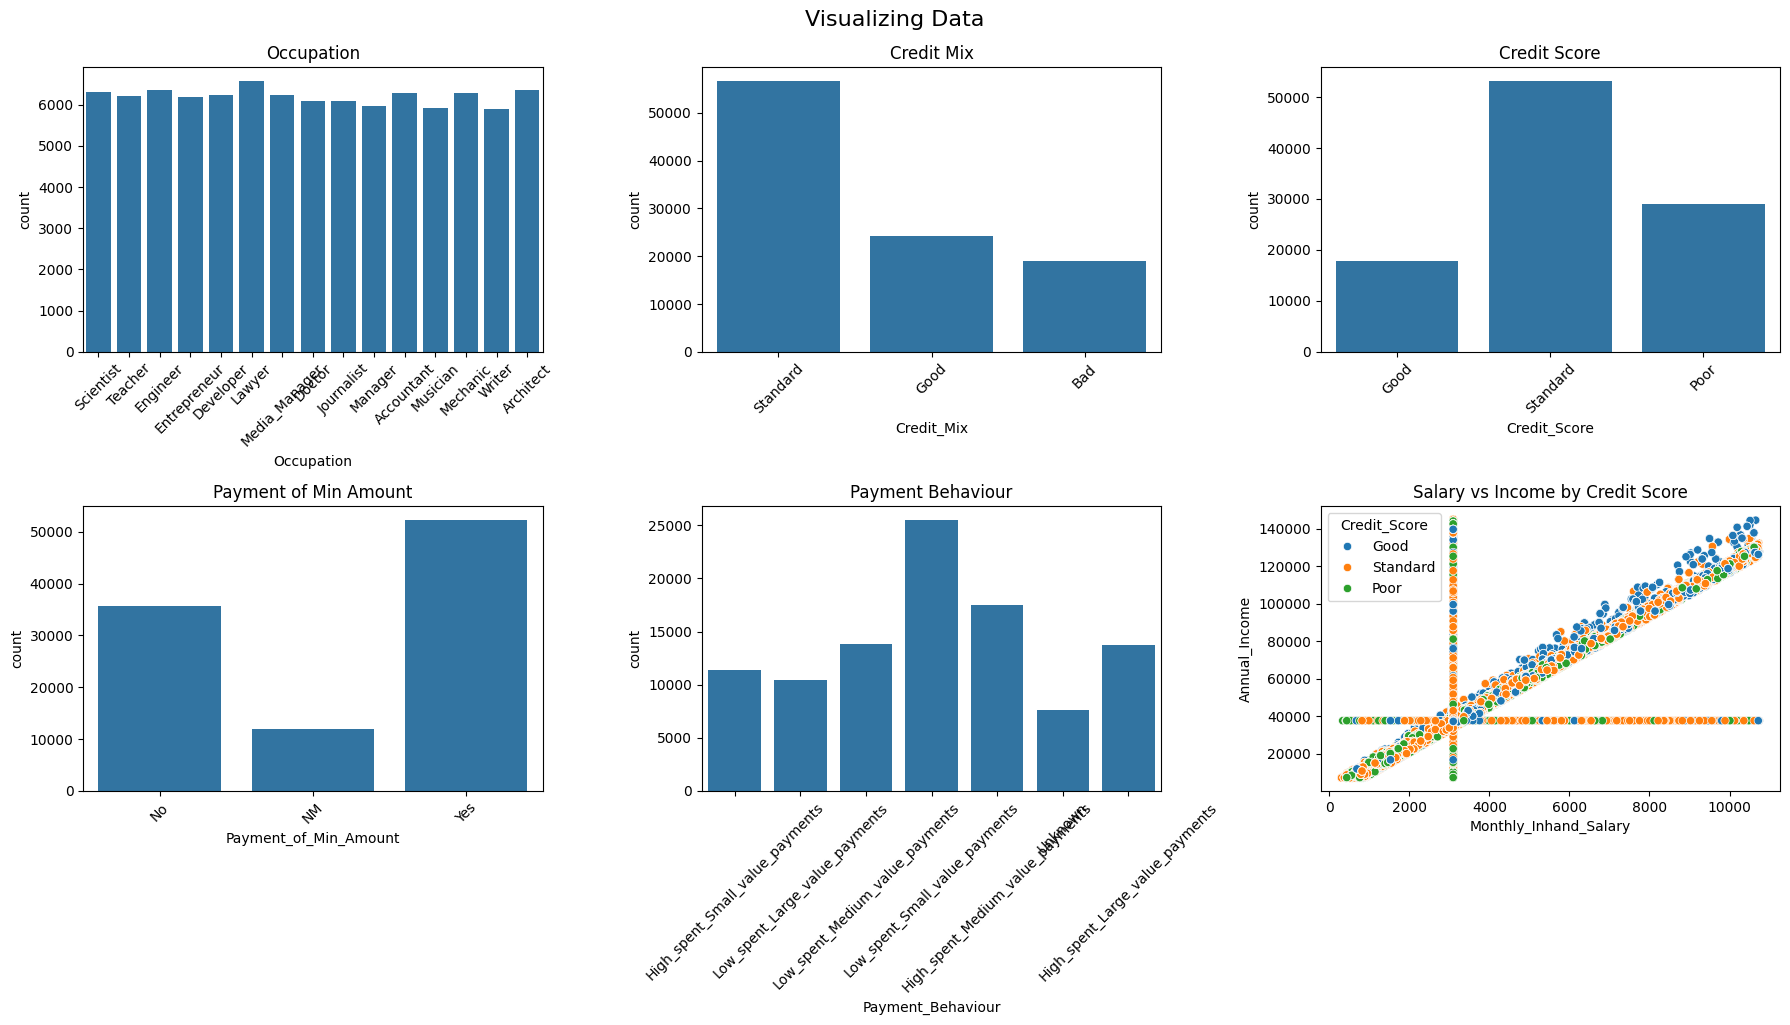

In [516]:
plt.figure(figsize=(18, 10))
r, c = 2, 3

# 1. Occupation
plt.subplot(r, c, 1)
sns.countplot(data=df_train, x="Occupation")
plt.xticks(rotation=45)
plt.title("Occupation")

# 2. Credit Mix
plt.subplot(r, c, 2)
sns.countplot(data=df_train, x="Credit_Mix")
plt.xticks(rotation=45)
plt.title("Credit Mix")

# 3. Credit Score
plt.subplot(r, c, 3)
sns.countplot(data=df_train, x="Credit_Score")
plt.xticks(rotation=45)
plt.title("Credit Score")

# 4. Payment of Min Amount
plt.subplot(r, c, 4)
sns.countplot(data=df_train, x="Payment_of_Min_Amount")
plt.xticks(rotation=45)
plt.title("Payment of Min Amount")

# 5. Payment Behaviour
plt.subplot(r, c, 5)
sns.countplot(data=df_train, x="Payment_Behaviour")
plt.xticks(rotation=45)
plt.title("Payment Behaviour")

# 6. Scatter Plot: Salary vs Income
plt.subplot(r, c, 6)
sns.scatterplot(data=df_train, x="Monthly_Inhand_Salary", y="Annual_Income", hue="Credit_Score")
plt.title("Salary vs Income by Credit Score")

plt.tight_layout()
plt.suptitle('Visualizing Data', fontsize=16, y=1.02)
plt.show()

# DATA MODELING TRAINING

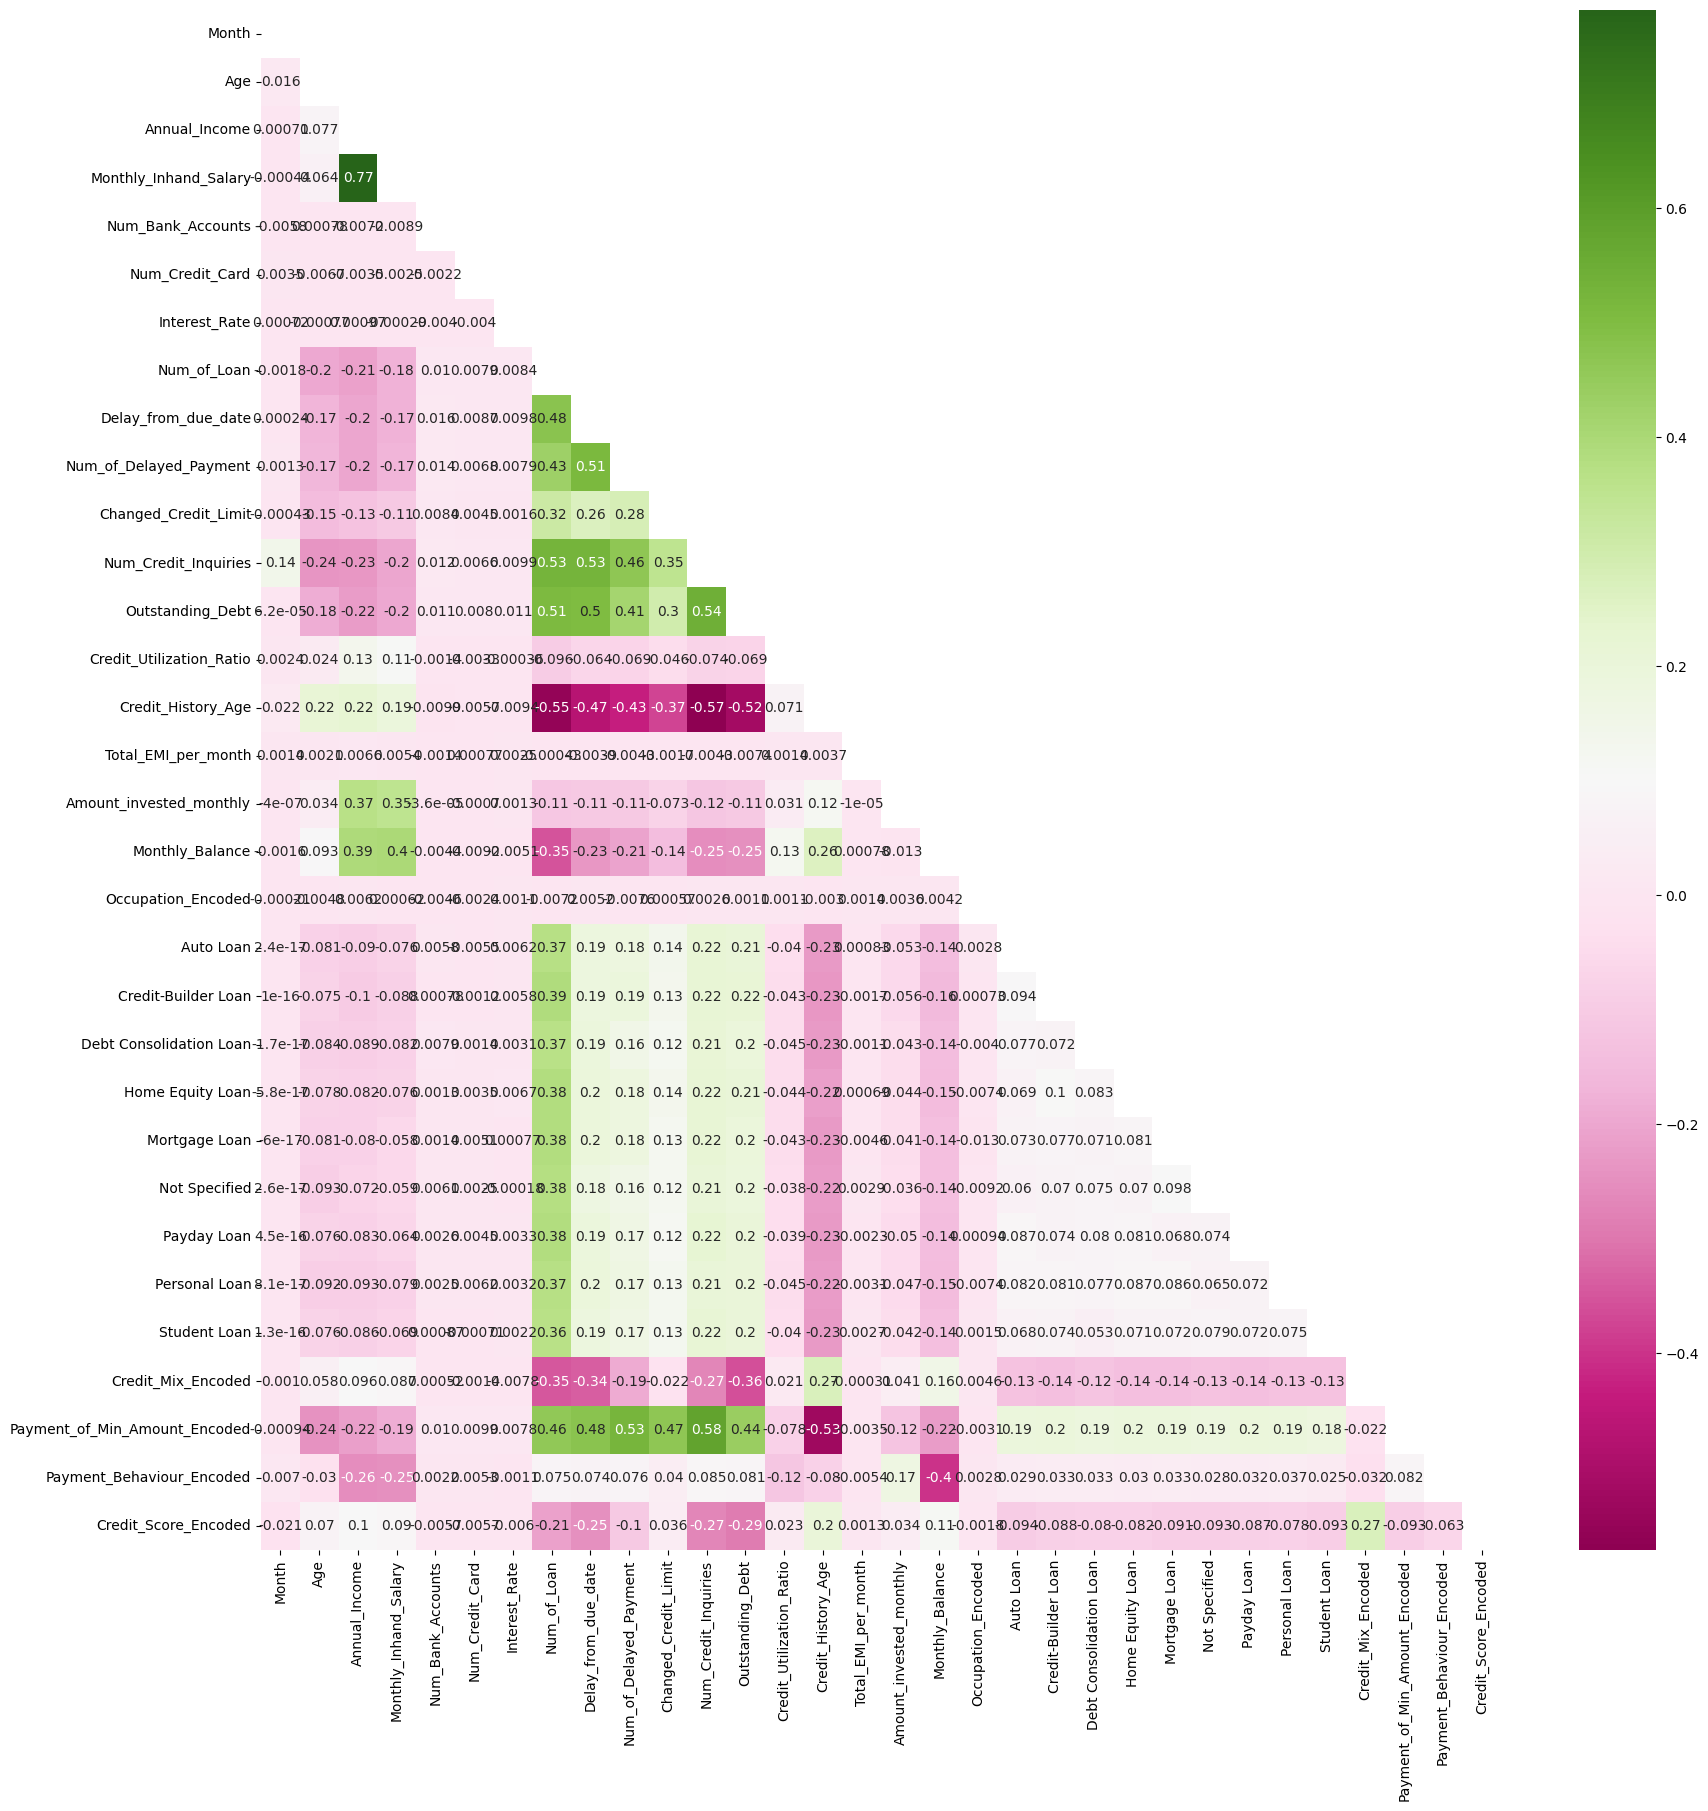

In [517]:
# Correlation between Numerical features
plt.figure(figsize=(20, 20))
sns.heatmap(df_train.select_dtypes(include = "number").corr(), 
            mask=np.triu(np.ones_like(df_train.select_dtypes(include = "number").corr(), dtype=bool)), 
            annot=True, cmap="PiYG")
plt.show()

In [518]:
df_train.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Occupation_Encoded', 'Auto Loan',
       'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan',
       'Mortgage Loan', 'Not Specified', 'Payday Loan', 'Personal Loan',
       'Student Loan', 'Credit_Mix_Encoded', 'Payment_of_Min_Amount_Encoded',
       'Payment_Behaviour_Encoded', 'Credit_Score_Encoded'],
      dtype='object')

In [519]:
#Droping original columns of onject and replacing with its encoded version
df_trainModel = df_train.drop(['Occupation', 'Credit_Mix', 'Type_of_Loan',
                               'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'], axis=1)

In [520]:
df_trainModel.columns

Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Occupation_Encoded', 'Auto Loan',
       'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan',
       'Mortgage Loan', 'Not Specified', 'Payday Loan', 'Personal Loan',
       'Student Loan', 'Credit_Mix_Encoded', 'Payment_of_Min_Amount_Encoded',
       'Payment_Behaviour_Encoded', 'Credit_Score_Encoded'],
      dtype='object')

In [521]:
# independent and dependent split
y= df_trainModel['Credit_Score_Encoded']
X= df_trainModel.drop('Credit_Score_Encoded', axis=1)

In [522]:
print(X.shape)  # Should be (100000, n_features)
print(y.shape)  # Should be (100000,) ideally


(100000, 31)
(100000,)


In [ ]:
# train-test split
X_train, X_test, y_train, y_test= train_test_split(
                                        X, y, test_size=0.2, random_state=42
                                        )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 31), (20000, 31), (80000,), (20000,))

In [524]:
# target value of test part of the split
y_test.to_numpy()

array([1, 0, 1, ..., 0, 2, 2], shape=(20000,))

### Logistic Regression

In [525]:
lr_clf = LogisticRegression(max_iter=140)
lr_clf.fit(X_train, y_train)

c:\Users\HP\OneDrive\Desktop\projectWorks\Credit_score\creditVENV\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=140)

In [526]:
# prediction of test
y_pred_lr= lr_clf.predict(X_test)
y_pred_lr

array([2, 2, 2, ..., 2, 2, 2], shape=(20000,))

In [527]:
cm_lr= confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[2475,    2, 3397],
       [  65,   15, 3447],
       [1575,   19, 9005]])

Text(0.5, 1.0, 'Confusion Matrix of LR')

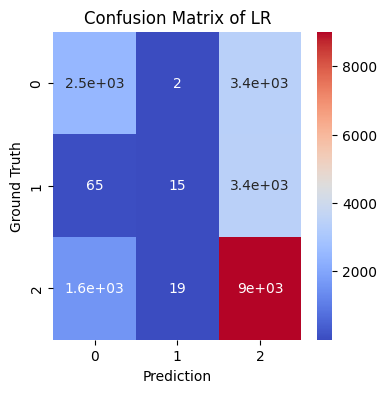

In [550]:
plt.figure(figsize=(4,4))

sns.heatmap(cm_lr, cmap='coolwarm', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.title('Confusion Matrix of LR')

#### check accuracy
- accuracy = correct classification/ total no. of classification

In [ ]:
accuracy_lr= accuracy_score(y_test, y_pred_lr)

-multiclass classification (more than 2 classes like Poor, Standard, Good), so use average='weighted'

In [557]:
print('Logistic Regression')
Precision_lr= precision_score(y_test, y_pred_lr, average='weighted')
Recall_lr= recall_score(y_test, y_pred_lr, average='weighted')
F1Score_lr= f1_score(y_test, y_pred_lr, average='weighted')

Logistic Regression


### Random Forest Classifier

In [531]:
rf_clf= RandomForestClassifier(n_estimators=20)
rf_clf.fit(X_train, y_train)
y_pred_rf= rf_clf.predict(X_test)

In [532]:
y_pred_rf= rf_clf.predict(X_test)
y_pred_rf

array([1, 0, 1, ..., 2, 2, 0], shape=(20000,))

In [533]:
cm_rf= confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[4613,  179, 1082],
       [  44, 2474, 1009],
       [1267,  876, 8456]])

Text(0.5, 1.0, 'Confusion Matrix of RF')

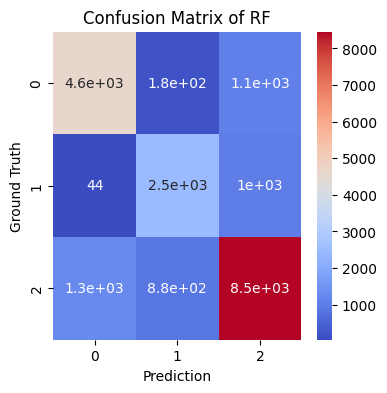

In [551]:
plt.figure(figsize=(4,4))

sns.heatmap(cm_rf, cmap='coolwarm', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.title('Confusion Matrix of RF')

In [558]:
accuracy_rf= accuracy_score(y_test, y_pred_rf)

In [559]:
print('Random Forest')
Precision_rf= precision_score(y_test, y_pred_rf, average='weighted')
Recall_rf= recall_score(y_test, y_pred_rf, average='weighted')
F1Score_rf= f1_score(y_test, y_pred_rf, average='weighted')

Random Forest


### XGBoost

In [537]:
xg_clf = XGBClassifier()
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [538]:
y_pred_xg= xg_clf.predict(X_test)
y_pred_xg

array([1, 2, 1, ..., 2, 2, 0], shape=(20000,))

In [539]:
cm_xg= confusion_matrix(y_test, y_pred_xg)
cm_xg

array([[4252,  215, 1407],
       [  46, 2404, 1077],
       [1310,  924, 8365]])

Text(0.5, 1.0, 'Confusion Matrix of XG')

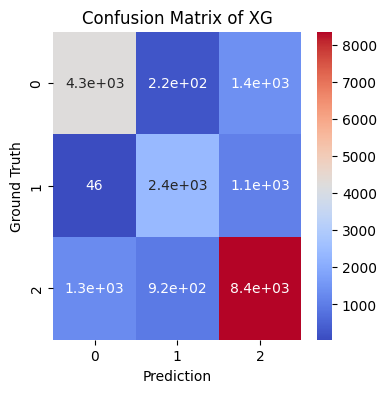

In [552]:
plt.figure(figsize=(4,4))

sns.heatmap(cm_xg, cmap='coolwarm', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.title('Confusion Matrix of XG')

In [560]:
accuracy_xg=accuracy_score(y_test, y_pred_xg)

In [561]:
print('XG Boost Classifier')
Precision_xg= precision_score(y_test, y_pred_xg, average='weighted')
Recall_xg= recall_score(y_test, y_pred_xg, average='weighted')
F1Score_xg= f1_score(y_test, y_pred_xg, average='weighted')

XG Boost Classifier


### LightGBM

In [543]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)


LGBMClassifier()

In [544]:
y_pred_lgb= lgb_clf.predict(X_test)
y_pred_lgb

array([1, 0, 1, ..., 2, 2, 0], shape=(20000,))

In [545]:
cm_lgb= confusion_matrix(y_test, y_pred_lgb)
cm_lgb

array([[3943,  312, 1619],
       [  47, 2359, 1121],
       [1329, 1109, 8161]])

Text(0.5, 1.0, 'Confusion Matrix of LGBM')

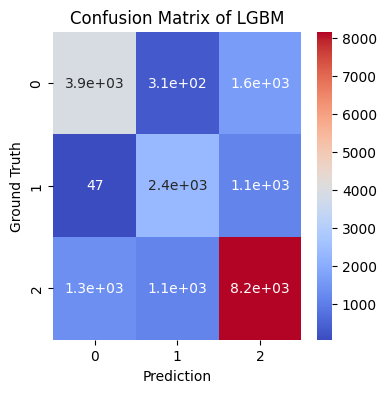

In [553]:
plt.figure(figsize=(4,4))

sns.heatmap(cm_lgb, cmap='coolwarm', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.title('Confusion Matrix of LGBM')

In [564]:
accuracy_lgbm= accuracy_score(y_test, y_pred_lgb)

In [565]:
print('LightGBM Classifier')
Precision_lgbm=precision_score(y_test, y_pred_lgb, average='weighted')
Recall_lgbm=recall_score(y_test, y_pred_lgb, average='weighted')
F1Score_lgbm=f1_score(y_test, y_pred_lgb, average='weighted')

LightGBM Classifier


In [ ]:
# Example metric values for your models (replace with your actual results)
metrics_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_xg, accuracy_lgbm],
    'Precision': [Precision_lr, Precision_lr, Precision_xg, Precision_lgbm],
    'Recall': [Recall_lr, Recall_rf, Recall_xg, Recall_lgbm],
    'F1 Score': [F1Score_lr, F1Score_rf, F1Score_xg, F1Score_lgbm]
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the table
print(metrics_df)


                 Model  Accuracy  Precision   Recall  F1 Score
0  Logistic Regression   0.57475   0.551232  0.57475  0.507901
1        Random Forest   0.77715   0.551232  0.77715  0.777177
2              XGBoost   0.75105   0.750953  0.75105  0.750828
3             LightGBM   0.72315   0.724522  0.72315  0.723110


In [554]:
import joblib

# After training
joblib.dump(rf_clf, 'random_forest_model.pkl')  # Saves the trained model


['random_forest_model.pkl']

Outstanding_Debt            0.097118
Interest_Rate               0.074610
Delay_from_due_date         0.064225
Changed_Credit_Limit        0.053171
Credit_History_Age          0.052134
Num_Credit_Card             0.047371
Credit_Mix_Encoded          0.044847
Num_of_Delayed_Payment      0.042250
Credit_Utilization_Ratio    0.040123
Annual_Income               0.039602
dtype: float64


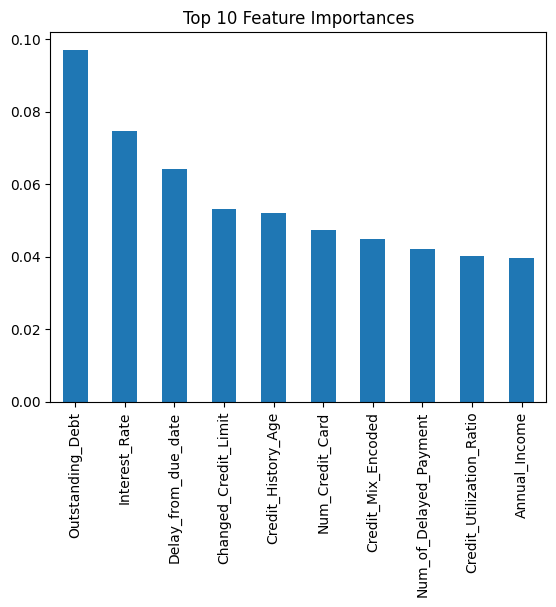

In [555]:
importances = rf_clf.feature_importances_

# Map them to feature names
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Show top features
print(feat_imp.head(10))

# Optional: Plot them
feat_imp.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.show()